In [30]:
import pandas as pd
import matplotlib.pyplot as plt

file_path2 = 'GRAPH_SUS.csv'
df2 = pd.read_csv(file_path2)


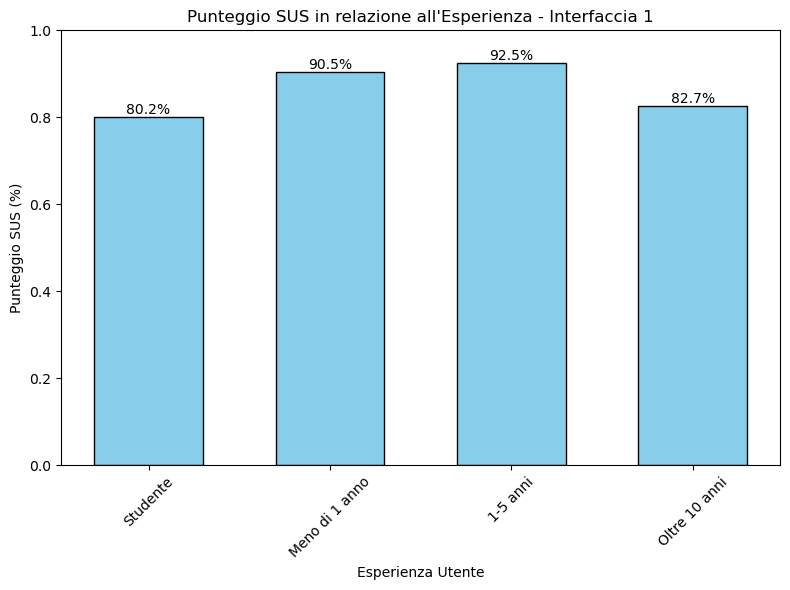

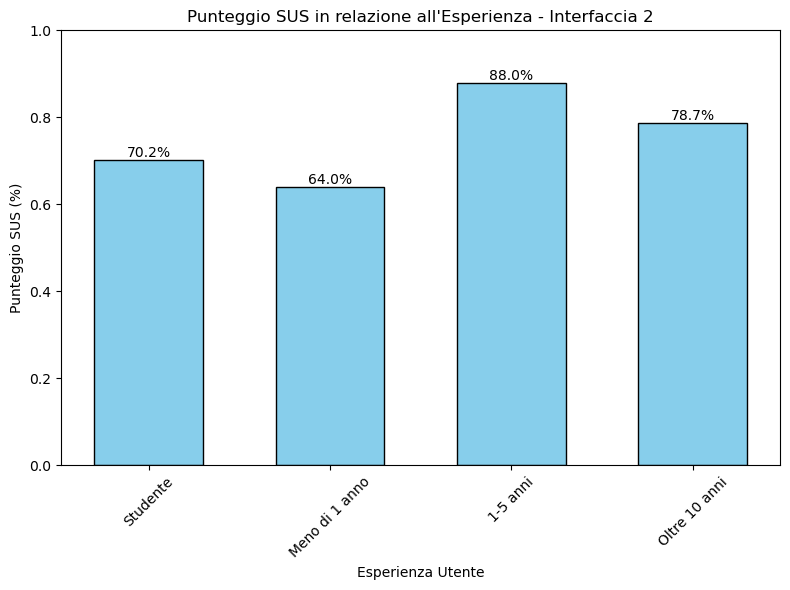

In [31]:
#conversione del punteggio in percentuale
df2['Punteggio SUS'] = df2['Punteggio SUS'] / 100

order = ['Studente', 'Meno di 1 anno', '1-5 anni', 'Oltre 10 anni']

#raggruppo i dati per Interfaccia ed Esperienza, calcolando la media del punteggio SUS
aggregated_df = df2.groupby(['Interfaccia', 'Esperienza'])['Punteggio SUS'].mean().reset_index()

#creazione grafico per ogni interfaccia
for interface in df2['Interfaccia'].unique():
    #seleziono l'interfaccia
    interface_data = aggregated_df[aggregated_df['Interfaccia'] == interface]
    
    #riordino il df in base alle etichette
    interface_data = interface_data.set_index('Esperienza').loc[order].reset_index()
    
    
    plt.figure(figsize=(8, 6))
    x = interface_data['Esperienza']
    y = interface_data['Punteggio SUS']
    bar_width = 0.6
    
    plt.bar(x, y, width=bar_width, color='skyblue', edgecolor='black')
    plt.xlabel('Esperienza Utente')
    plt.ylabel('Punteggio SUS (%)')
    plt.title(f'Punteggio SUS in relazione all\'Esperienza - Interfaccia {interface}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1) 
    plt.tight_layout()
    
    #etichette barre
    for i, v in enumerate(y):
        plt.text(i, v, f'{v:.1%}', ha='center', va='bottom')
    
    plt.show()